# Validation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [6]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [7]:
ds = pd.read_csv("Dataset-Unicauca-Version2-87Atts.csv",nrows=50_000)
ds.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.PSH.Flags,Bwd.PSH.Flags,Fwd.URG.Flags,Bwd.URG.Flags,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,FIN.Flag.Count,SYN.Flag.Count,RST.Flag.Count,PSH.Flag.Count,ACK.Flag.Count,URG.Flag.Count,CWE.Flag.Count,ECE.Flag.Count,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Fwd.Avg.Bytes.Bulk,Fwd.Avg.Packets.Bulk,Fwd.Avg.Bulk.Rate,Bwd.Avg.Bytes.Bulk,Bwd.Avg.Packets.Bulk,Bwd.Avg.Bulk.Rate,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,132,110414,6,6,6.000000,0.000000,4380,1187,2007.527273,768.481689,2.428355e+06,1.691453e+03,598.986842,816.061346,3880.0,1,45523.0,2167.761905,1319.384512,5988.0,698,41178,762.555556,1230.348220,5133.0,1,0,0,0,0,440,1100,4.832722e+02,1208.180480,6,4380,1417.333333,1121.579194,1.257940e+06,0,0,0,0,1,0,0,0,2,1435.74026,6.000000,2007.527273,440,0,0,0,0,0,0,22,132,55,110414,256,490,21,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.000000,0.000000,1.0,1,0,0.000000,0.000000,0.0,0,0,0,0,0,40,0,2.000000e+06,0.000000,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,0,9.00000,6.000000,0.000000,40,0,0,0,0,0,0,2,12,0,0,490,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,674,0,337,0,224.666667,194.567041,0,0,0.000000,0.000000,6.740000e+08,3.000000e+06,0.500000,0.707107,1.0,0,1.0,0.500000,0.707107,1.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,96,0,3.000000e+06,0.000000,0,337,252.750000,168.500000,2.839225e+04,0,1,0,0,1,0,0,0,0,337.00000,224.666667,0.000000,96,0,0,0,0,0,0,3,674,0,0,888,-1,1,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.000000,0.000000,0.0,0,107,53.500000,75.660426,107.0,0,0,0,0,0,32,96,4.608295e+03,13824.884793,0,0,0.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,3,0.00000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,3,0,888,490,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.000000,25758.502350,54313.0,0,0,0.000000,0.000000,0.0,0,1,0,0,0,100,0,6.404673e+01,0.000000,6,529,267.500000,286.458898,8.205870e+04,0,1,0,0,1,0,0,0,0,321.00000,215.200000,0.000000,100,0,0,0,0,0,0,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,131,HTTP_PROXY


In [8]:
outlier_columns = ['Flow.Duration',
                   'Total.Fwd.Packets','Total.Backward.Packets',
                   'Total.Length.of.Fwd.Packets','Total.Length.of.Bwd.Packets',
                   'Fwd.Packet.Length.Max','Fwd.Packet.Length.Min',
                   'Fwd.Packet.Length.Mean','Fwd.Packet.Length.Std',
                   'Bwd.Packet.Length.Max','Bwd.Packet.Length.Min',
                   'Bwd.Packet.Length.Mean','Bwd.Packet.Length.Std',
                   'Flow.Bytes.s','Flow.Packets.s','Flow.IAT.Mean',
                   'Flow.IAT.Std','Flow.IAT.Max','Flow.IAT.Min',
                   'Fwd.IAT.Total','Fwd.IAT.Mean','Fwd.IAT.Std',
                   'Fwd.IAT.Max','Fwd.IAT.Min','Bwd.IAT.Total',
                   'Bwd.IAT.Mean','Bwd.IAT.Std','Bwd.IAT.Max',
                   'Bwd.IAT.Min','Fwd.Header.Length','Bwd.Header.Length',
                   'Fwd.Packets.s','Bwd.Packets.s','Min.Packet.Length',
                   'Max.Packet.Length','Packet.Length.Mean',
                   'Packet.Length.Std','Packet.Length.Variance',
                   'Down.Up.Ratio','Average.Packet.Size',
                   'Avg.Fwd.Segment.Size','Avg.Bwd.Segment.Size',
                   'Fwd.Header.Length.1','Subflow.Fwd.Packets',
                   'Subflow.Fwd.Bytes','Subflow.Bwd.Packets',
                   'Subflow.Bwd.Bytes','Init_Win_bytes_forward',
                   'Init_Win_bytes_backward','act_data_pkt_fwd',
                   'Active.Mean','Active.Std','Active.Max','Active.Min',
                   'Idle.Mean','Idle.Std','Idle.Max','Idle.Min',
]

In [9]:
ds = ds[(np.abs(stats.zscore(ds[outlier_columns])) < 4).all(axis=1)]

## Data engineering

In [10]:
ds.drop(['Flow.ID','Bwd.PSH.Flags','Fwd.PSH.Flags','Fwd.URG.Flags','Bwd.URG.Flags','FIN.Flag.Count',
         'SYN.Flag.Count','RST.Flag.Count','PSH.Flag.Count','ACK.Flag.Count','URG.Flag.Count','CWE.Flag.Count','ECE.Flag.Count',
        'Fwd.Avg.Bytes.Bulk','Fwd.Avg.Packets.Bulk','Fwd.Avg.Bulk.Rate','Bwd.Avg.Bytes.Bulk','Bwd.Avg.Packets.Bulk','Bwd.Avg.Bulk.Rate','ProtocolName'
        ],axis=1, inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
# ds['ProtocolName'] = le.fit_transform(ds['ProtocolName'])
ds['Label'] = le.fit_transform(ds['Label'])
ds['Destination.IP'] = le.fit_transform(ds['Destination.IP'])
ds['Source.IP'] = le.fit_transform(ds['Source.IP'])
ds['Timestamp'] = le.fit_transform(ds['Timestamp'])  

In [13]:
ds.head()

,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,Fwd.Packet.Length.Mean,Fwd.Packet.Length.Std,Bwd.Packet.Length.Max,Bwd.Packet.Length.Min,Bwd.Packet.Length.Mean,Bwd.Packet.Length.Std,Flow.Bytes.s,Flow.Packets.s,Flow.IAT.Mean,Flow.IAT.Std,Flow.IAT.Max,Flow.IAT.Min,Fwd.IAT.Total,Fwd.IAT.Mean,Fwd.IAT.Std,Fwd.IAT.Max,Fwd.IAT.Min,Bwd.IAT.Total,Bwd.IAT.Mean,Bwd.IAT.Std,Bwd.IAT.Max,Bwd.IAT.Min,Fwd.Header.Length,Bwd.Header.Length,Fwd.Packets.s,Bwd.Packets.s,Min.Packet.Length,Max.Packet.Length,Packet.Length.Mean,Packet.Length.Std,Packet.Length.Variance,Down.Up.Ratio,Average.Packet.Size,Avg.Fwd.Segment.Size,Avg.Bwd.Segment.Size,Fwd.Header.Length.1,Subflow.Fwd.Packets,Subflow.Fwd.Bytes,Subflow.Bwd.Packets,Subflow.Bwd.Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol
1,14,3128,328,52422,6,0,1,2,0,12,0,6,6,6.000000,0.000000,0,0,0.000000,0.000000,1.200000e+07,2.000000e+06,1.000000,0.000000,1.0,1,1.0,1.00,0.000000,1.0,1,0,0.000000,0.000000,0.0,0,40,0,2.000000e+06,0.000000,6,6,6.0,0.000000,0.000000,0,9.000000,6.000000,0.000000,40,2,12,0,0,490,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,0,131
3,557,80,17,38848,6,0,217,1,3,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000e+00,1.843318e+04,72.333333,62.660461,110.0,0,0.0,0.00,0.000000,0.0,0,107,53.500000,75.660426,107.0,0,32,96,4.608295e+03,13824.884793,0,0,0.0,0.000000,0.000000,3,0.000000,0.000000,0.000000,32,1,0,3,0,888,490,0,32,0.0,0.0,0,0,0.0,0.0,0,0,0,7
4,429,55961,22,3128,6,0,78068,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.378286e+04,6.404673e+01,19517.000000,25758.502350,54313.0,0,78068.0,19517.00,25758.502350,54313.0,0,0,0.000000,0.000000,0.0,0,100,0,6.404673e+01,0.000000,6,529,267.5,286.458898,82058.700000,0,321.000000,215.200000,0.000000,100,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,0,131
6,429,55963,22,3128,6,0,104443,5,0,1076,0,529,6,215.200000,286.458898,0,0,0.000000,0.000000,1.030227e+04,4.787300e+01,26110.750000,31559.206152,63644.0,0,104443.0,26110.75,31559.206152,63644.0,0,0,0.000000,0.000000,0.0,0,100,0,4.787300e+01,0.000000,6,529,267.5,286.458898,82058.700000,0,321.000000,215.200000,0.000000,100,5,1076,0,0,253,-1,4,20,0.0,0.0,0,0,0.0,0.0,0,0,0,131
7,180,51848,21,3128,6,0,11002,3,12,232,3664,226,0,77.333333,128.784057,3628,0,305.333333,1046.372898,3.541174e+05,1.363388e+03,785.857143,2099.118418,7865.0,0,10012.0,5006.00,4043.236575,7865.0,2147,10788,980.727273,2880.864908,9625.0,0,72,300,2.726777e+02,1090.710780,0,3628,243.5,904.250555,817669.066667,4,259.733333,77.333333,305.333333,72,3,232,12,3664,8192,245,2,20,0.0,0.0,0,0,0.0,0.0,0,0,0,130


## Modelling and Validation


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [15]:
y_column = 'L7Protocol' # target variable
X_columns = ['Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port',
       'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets',
       'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets',
       'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max',
       'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean',
       'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max',
       'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean',
       'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s',
       'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min',
       'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max',
       'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std',
       'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.Header.Length', 'Bwd.Header.Length',
       'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length',
       'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std',
       'Packet.Length.Variance', 'Down.Up.Ratio', 'Average.Packet.Size',
       'Avg.Fwd.Segment.Size', 'Avg.Bwd.Segment.Size', 'Fwd.Header.Length.1',
       'Subflow.Fwd.Packets', 'Subflow.Fwd.Bytes', 'Subflow.Bwd.Packets',
       'Subflow.Bwd.Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active.Mean', 'Active.Std', 'Active.Max', 'Active.Min', 'Idle.Mean',
       'Idle.Std', 'Idle.Max', 'Idle.Min', 'Label',
       ]
X = ds[X_columns]
y = ds[y_column]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
lr = LogisticRegression(max_iter=100_000)
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
gnb = GaussianNB()
sgd = SGDClassifier()
dt = DecisionTreeClassifier()

## Model metrics


In [18]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


In [19]:
def creport(model):
    ypred = model.predict(X_test)
    return metrics.classification_report(y_test, ypred)

In [20]:
random_forest = rf
random_forest.fit(X_train,y_train)
print(creport(random_forest))

              precision    recall  f1-score   support

           7       0.91      0.97      0.93      4550
          40       1.00      1.00      1.00       101
          60       0.00      0.00      0.00         1
          64       0.67      0.36      0.47        11
          68       0.93      0.28      0.43        47
          70       0.97      0.40      0.56        86
          91       0.84      0.92      0.88      1335
         114       0.00      0.00      0.00         1
         119       0.86      0.75      0.80        81
         120       0.83      0.31      0.45        32
         121       1.00      0.27      0.43        22
         122       1.00      0.05      0.09        65
         124       0.84      0.57      0.68       553
         125       0.50      0.15      0.23        66
         126       0.80      0.88      0.84      2120
         130       0.78      0.88      0.83      1049
         131       0.83      0.75      0.78      1557
         142       1.00    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [21]:
KNN = knn
KNN.fit(X_train,y_train)
print(creport(KNN))

              precision    recall  f1-score   support

           7       0.82      0.91      0.87      4550
          40       0.86      0.97      0.91       101
          60       0.00      0.00      0.00         1
          64       0.36      0.36      0.36        11
          68       0.48      0.21      0.29        47
          70       0.27      0.23      0.25        86
          91       0.53      0.60      0.56      1335
         114       0.00      0.00      0.00         1
         119       0.51      0.52      0.52        81
         120       0.43      0.28      0.34        32
         121       0.75      0.14      0.23        22
         122       0.09      0.03      0.05        65
         124       0.46      0.40      0.43       553
         125       0.07      0.03      0.04        66
         126       0.62      0.68      0.65      2120
         130       0.57      0.54      0.55      1049
         131       0.62      0.46      0.53      1557
         142       0.71    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [41]:
logistic_regression = lr
logistic_regression.fit(X_train,y_train)
print(creport(logistic_regression))

              precision    recall  f1-score   support

           7       0.82      0.83      0.82      4550
          40       0.51      0.39      0.44       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.00      0.00      0.00        86
          91       0.32      0.21      0.25      1335
         114       0.00      0.00      0.00         1
         119       0.46      0.15      0.22        81
         120       0.00      0.00      0.00        32
         121       0.50      0.05      0.08        22
         122       0.00      0.00      0.00        65
         124       0.54      0.03      0.05       553
         125       0.00      0.00      0.00        66
         126       0.33      0.80      0.46      2120
         130       0.32      0.13      0.19      1049
         131       0.36      0.19      0.25      1557
         142       1.00    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classific

              precision    recall  f1-score   support

           7       0.82      0.83      0.82      4550
          40       0.51      0.39      0.44       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.00      0.00      0.00        86
          91       0.32      0.21      0.25      1335
         114       0.00      0.00      0.00         1
         119       0.46      0.15      0.22        81
         120       0.00      0.00      0.00        32
         121       0.50      0.05      0.08        22
         122       0.00      0.00      0.00        65
         124       0.54      0.03      0.05       553
         125       0.00      0.00      0.00        66
         126       0.33      0.80      0.46      2120
         130       0.32      0.13      0.19      1049
         131       0.36      0.19      0.25      1557
         142       1.00    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classific

In [42]:
svc_classification = svc
svc_classification.fit(X_train,y_train)
print(creport(svc_classification))

              precision    recall  f1-score   support

           7       0.45      0.97      0.62      4550
          40       0.00      0.00      0.00       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.00      0.00      0.00        86
          91       0.65      0.02      0.04      1335
         114       0.00      0.00      0.00         1
         119       0.00      0.00      0.00        81
         120       0.00      0.00      0.00        32
         121       0.00      0.00      0.00        22
         122       0.00      0.00      0.00        65
         124       0.81      0.02      0.05       553
         125       0.00      0.00      0.00        66
         126       0.45      0.52      0.48      2120
         130       0.58      0.04      0.07      1049
         131       0.57      0.02      0.03      1557
         142       0.00    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           7       0.45      0.97      0.62      4550
          40       0.00      0.00      0.00       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.00      0.00      0.00        86
          91       0.65      0.02      0.04      1335
         114       0.00      0.00      0.00         1
         119       0.00      0.00      0.00        81
         120       0.00      0.00      0.00        32
         121       0.00      0.00      0.00        22
         122       0.00      0.00      0.00        65
         124       0.81      0.02      0.05       553
         125       0.00      0.00      0.00        66
         126       0.45      0.52      0.48      2120
         130       0.58      0.04      0.07      1049
         131       0.57      0.02      0.03      1557
         142       0.00    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [43]:
gnb_classification = gnb
gnb_classification.fit(X_train,y_train)
print(creport(gnb_classification))

              precision    recall  f1-score   support

           7       0.69      0.02      0.03      4550
          40       0.10      1.00      0.17       101
          60       0.01      1.00      0.03         1
          64       0.00      0.82      0.01        11
          68       0.00      0.00      0.00        47
          70       0.04      0.02      0.03        86
          91       0.07      0.00      0.00      1335
         114       0.00      0.00      0.00         1
         119       0.30      0.32      0.31        81
         120       0.00      0.00      0.00        32
         121       0.01      0.14      0.01        22
         122       0.04      0.12      0.06        65
         123       0.00      0.00      0.00         0
         124       0.31      0.07      0.11       553
         125       0.01      0.02      0.01        66
         126       0.41      0.03      0.05      2120
         130       0.40      0.00      0.00      1049
         131       0.29    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           7       0.69      0.02      0.03      4550
          40       0.10      1.00      0.17       101
          60       0.01      1.00      0.03         1
          64       0.00      0.82      0.01        11
          68       0.00      0.00      0.00        47
          70       0.04      0.02      0.03        86
          91       0.07      0.00      0.00      1335
         114       0.00      0.00      0.00         1
         119       0.30      0.32      0.31        81
         120       0.00      0.00      0.00        32
         121       0.01      0.14      0.01        22
         122       0.04      0.12      0.06        65
         123       0.00      0.00      0.00         0
         124       0.31      0.07      0.11       553
         125       0.01      0.02      0.01        66
         126       0.41      0.03      0.05      2120
         130       0.40      0.00      0.00      1049
         131       0.29    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [44]:
sgd_classification = sgd
sgd_classification.fit(X_train,y_train)
print(creport(sgd_classification))

              precision    recall  f1-score   support

           7       0.81      0.71      0.76      4550
          40       0.20      0.75      0.32       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.01      0.02      0.01        86
          91       0.23      0.14      0.18      1335
         114       0.00      0.00      0.00         1
         119       0.00      0.00      0.00        81
         120       0.00      0.00      0.00        32
         121       0.00      0.00      0.00        22
         122       0.00      0.00      0.00        65
         123       0.00      0.00      0.00         0
         124       0.08      0.44      0.14       553
         125       0.00      0.00      0.00        66
         126       0.32      0.05      0.09      2120
         130       0.28      0.26      0.27      1049
         131       0.21    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           7       0.59      0.76      0.67      4550
          40       0.40      0.56      0.47       101
          60       0.00      0.00      0.00         1
          64       0.00      0.00      0.00        11
          68       0.00      0.00      0.00        47
          70       0.02      0.02      0.02        86
          91       0.22      0.27      0.24      1335
         114       0.00      0.00      0.00         1
         119       0.19      0.44      0.26        81
         120       0.00      0.00      0.00        32
         121       0.00      0.00      0.00        22
         122       0.00      0.00      0.00        65
         124       0.08      0.34      0.13       553
         125       0.00      0.00      0.00        66
         126       0.26      0.13      0.17      2120
         130       0.18      0.08      0.11      1049
         131       0.20      0.02      0.04      1557
         142       0.00    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [45]:
dt_classification = dt
dt_classification.fit(X_train,y_train)
print(creport(dt_classification))

              precision    recall  f1-score   support

           7       0.93      0.94      0.93      4550
          40       1.00      1.00      1.00       101
          60       0.00      0.00      0.00         1
          64       0.60      0.55      0.57        11
          68       0.55      0.45      0.49        47
          70       0.48      0.55      0.51        86
          91       0.88      0.86      0.87      1335
         114       0.00      0.00      0.00         1
         119       0.74      0.79      0.77        81
         120       0.38      0.41      0.39        32
         121       0.55      0.27      0.36        22
         122       0.61      0.52      0.56        65
         123       0.00      0.00      0.00         0
         124       0.64      0.63      0.63       553
         125       0.42      0.32      0.36        66
         126       0.81      0.83      0.82      2120
         130       0.75      0.75      0.75      1049
         131       0.77    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           7       0.93      0.93      0.93      4550
          40       0.99      0.99      0.99       101
          60       0.00      0.00      0.00         1
          64       0.67      0.55      0.60        11
          68       0.61      0.43      0.50        47
          70       0.49      0.57      0.52        86
          91       0.88      0.86      0.87      1335
         114       0.00      0.00      0.00         1
         119       0.67      0.78      0.72        81
         120       0.52      0.41      0.46        32
         121       0.70      0.32      0.44        22
         122       0.61      0.48      0.53        65
         123       0.00      0.00      0.00         0
         124       0.63      0.63      0.63       553
         125       0.34      0.30      0.32        66
         126       0.81      0.83      0.82      2120
         130       0.75      0.76      0.76      1049
         131       0.77    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [46]:
gb_classification = gb
gb_classification.fit(X_train,y_train)
print(creport(gb_classification))

              precision    recall  f1-score   support

           7       0.90      0.97      0.93      4550
          40       1.00      0.97      0.98       101
          60       0.00      0.00      0.00         1
          64       0.44      0.36      0.40        11
          68       0.65      0.32      0.43        47
          70       0.83      0.51      0.63        86
          91       0.89      0.87      0.88      1335
         114       0.00      0.00      0.00         1
         119       0.78      0.80      0.79        81
         120       0.61      0.44      0.51        32
         121       0.73      0.36      0.48        22
         122       0.37      0.23      0.28        65
         123       0.00      0.00      0.00         0
         124       0.86      0.49      0.62       553
         125       0.55      0.42      0.48        66
         126       0.79      0.87      0.83      2120
         130       0.77      0.82      0.79      1049
         131       0.78    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

              precision    recall  f1-score   support

           7       0.90      0.97      0.94      4550
          40       1.00      0.97      0.98       101
          60       0.00      0.00      0.00         1
          64       0.58      0.64      0.61        11
          68       0.67      0.34      0.45        47
          70       0.80      0.52      0.63        86
          91       0.88      0.87      0.88      1335
         114       0.00      0.00      0.00         1
         119       0.81      0.79      0.80        81
         120       0.54      0.44      0.48        32
         121       0.73      0.36      0.48        22
         122       0.40      0.26      0.31        65
         123       0.00      0.00      0.00         0
         124       0.87      0.49      0.62       553
         125       0.49      0.38      0.43        66
         126       0.79      0.87      0.83      2120
         130       0.78      0.82      0.80      1049
         131       0.79    

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

## Model evaluation


In [47]:
y_train_pred_rf = random_forest.predict(X_train)
y_train_pred_knn = KNN.predict(X_train)
y_train_pred_lr = logistic_regression.predict(X_train)
y_train_pred_gb = gb_classification.predict(X_train)
y_train_pred_svc = svc_classification.predict(X_train)
y_train_pred_gnb = gnb_classification.predict(X_train)
y_train_pred_sgd = sgd_classification.predict(X_train)
y_train_pred_dt = dt_classification.predict(X_train)

In [48]:
y_test_pred_rf = random_forest.predict(X_test)
y_test_pred_knn = KNN.predict(X_test)
y_test_pred_lr = logistic_regression.predict(X_test)
y_test_pred_gb = gb_classification.predict(X_test)
y_test_pred_svc = svc_classification.predict(X_test)
y_test_pred_gnb = gnb_classification.predict(X_test)
y_test_pred_sgd = sgd_classification.predict(X_test)
y_test_pred_dt = dt_classification.predict(X_test)

In [49]:
all_evaluate = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'Logistic Regression', "GradientBoostingClassifier",
              "SVC", "GaussianNB", "SGDClassifier", "DecisionTreeClassifier"],
    'Train Accuracy': [accuracy_score(y_train, y_train_pred_rf), accuracy_score(y_train, y_train_pred_knn),
                       accuracy_score(y_train, y_train_pred_lr), accuracy_score(y_train, y_train_pred_gb),
                       accuracy_score(y_train, y_train_pred_svc), accuracy_score(y_train, y_train_pred_gnb),
                       accuracy_score(y_train, y_train_pred_sgd), accuracy_score(y_train, y_train_pred_dt)],
    'Test Accuracy': [accuracy_score(y_test, y_test_pred_rf), accuracy_score(y_test, y_test_pred_knn),
                      accuracy_score(y_test, y_test_pred_lr), accuracy_score(y_test, y_test_pred_gb),
                      accuracy_score(y_test, y_test_pred_svc), accuracy_score(y_test, y_test_pred_gnb),
                      accuracy_score(y_test, y_test_pred_sgd), accuracy_score(y_test, y_test_pred_dt)],
    'f1-score': [f1_score(y_test, y_test_pred_rf, average='weighted'), f1_score(y_test, y_test_pred_knn, average='weighted'),
                 f1_score(y_test, y_test_pred_lr, average='weighted'), f1_score(y_test, y_test_pred_gb, average='weighted'),
                 f1_score(y_test, y_test_pred_svc, average='weighted'), f1_score(y_test, y_test_pred_gnb, average='weighted'),
                 f1_score(y_test, y_test_pred_sgd, average='weighted'), f1_score(y_test, y_test_pred_dt, average='weighted')]
})

print(all_evaluate)

                        Model  Train Accuracy  Test Accuracy  f1-score
0               Random Forest        0.999965       0.856022  0.846540
1                         KNN        0.764863       0.674351  0.661755
2         Logistic Regression        0.514612       0.513548  0.473113
3  GradientBoostingClassifier        0.887822       0.842190  0.835848
4                         SVC        0.452595       0.455715  0.327315
5                  GaussianNB        0.034666       0.035186  0.036883
6               SGDClassifier        0.368912       0.370865  0.375803
7      DecisionTreeClassifier        1.000000       0.830785  0.830380
                        Model  Train Accuracy  Test Accuracy  f1-score
0               Random Forest        0.999896       0.855941  0.846620
1                         KNN        0.764863       0.674351  0.661755
2         Logistic Regression        0.514612       0.513548  0.473113
3  GradientBoostingClassifier        0.886990       0.843080  0.836559
4     

In [50]:
model_list = [rf, knn, lr, gb, svc, gnb, sgd, dt]
accuracy_list = []
f1_list = []
roc_auc_list = []
for i in model_list:
    i_model = i.fit(X_train,y_train)
    y_pred = i_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
#     roc_auc = roc_auc_score(y_test,y_pred)
    accuracy_list.append(accuracy)
    f1_list.append(f1)
#      roc_auc_list.append(roc_auc)

C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Marian\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

In [51]:
models = ['Random Forest', 'KNN', 'Logistic Regression', "GradientBoostingClassifier",
"SVC", "GaussianNB", "SGDClassifier", "DecisionTreeClassifier"]

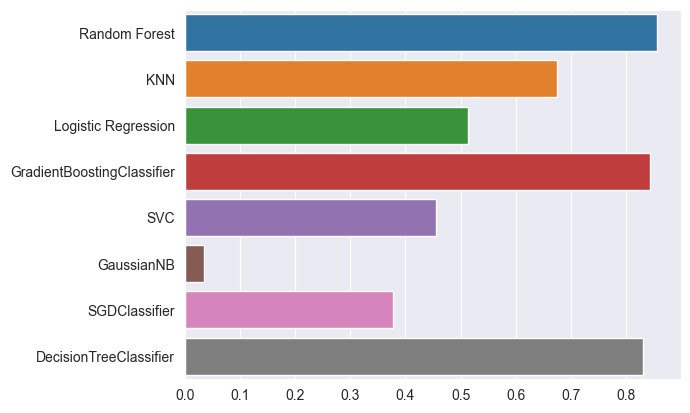

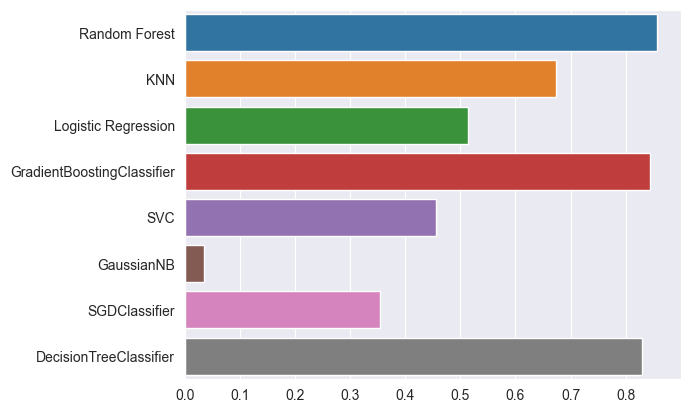

In [52]:
sns.barplot(y=models, x=accuracy_list)
plt.show()

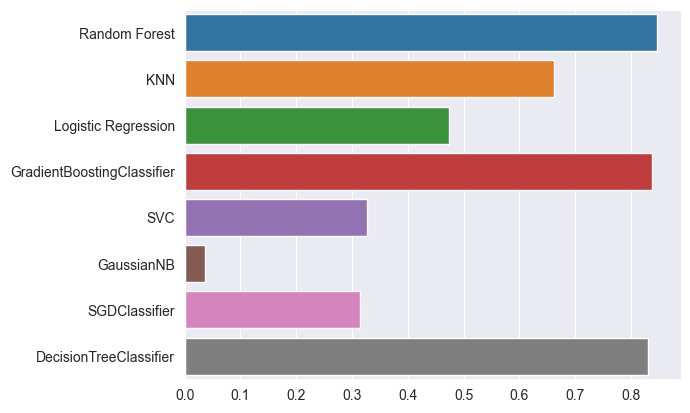

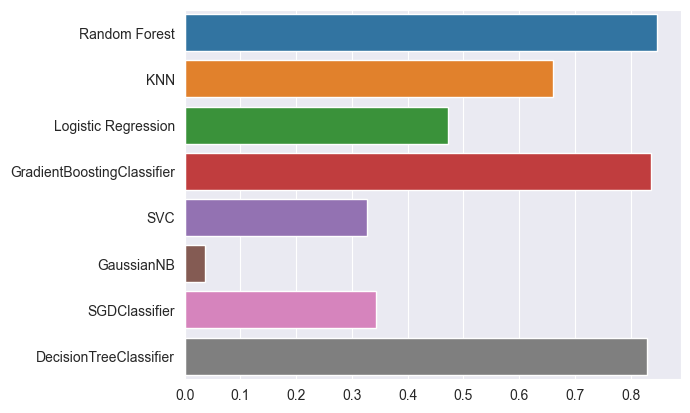

In [53]:
# visualizing the models f1 score
sns.barplot(y=models, x=f1_list)
plt.show()

[[4425    0    0 ...    0    0    3]
 [   3   98    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...   10    0    0]
 [   3    0    0 ...    0   12    0]
 [   1    0    0 ...    0    0    0]]


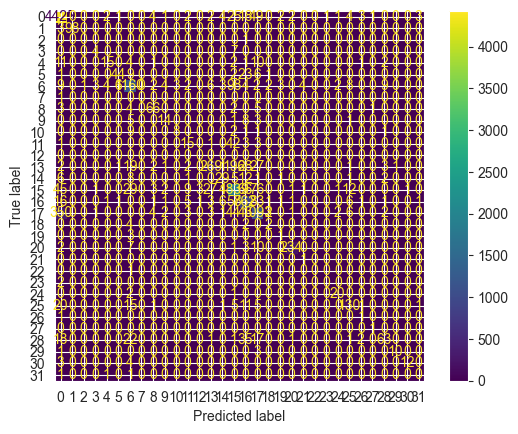

[[4432    0    0 ...    0    0    0]
 [   1  100    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...   10    0    0]
 [   3    0    0 ...    0   12    0]
 [   0    0    0 ...    0    0    2]]


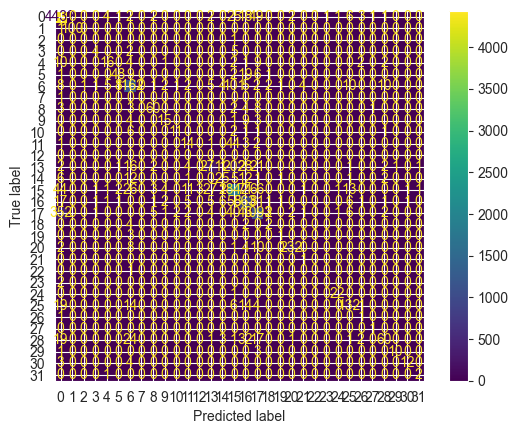

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

[[4253    1    1 ...    5    3    0]
 [   1  100    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...   12    0    0]
 [   1    0    0 ...    0   14    0]
 [   0    0    0 ...    0    0    2]]


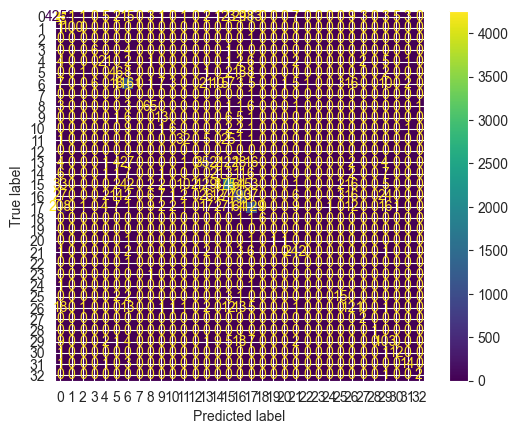

[[4259    1    0 ...    2    4    0]
 [   1  100    0 ...    0    0    0]
 [   0    0    0 ...    0    0    0]
 ...
 [   1    0    0 ...   12    0    0]
 [   1    0    0 ...    0   14    0]
 [   0    0    0 ...    0    0    2]]


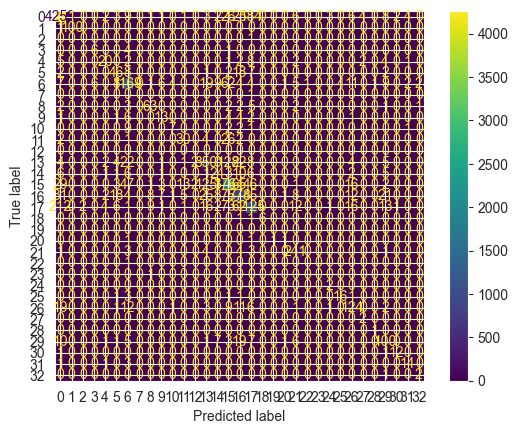

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

[[4403    0    0    0    0    0    5    0    1    0    0    0    2    0
    25   21   88    0    0    1    0    0    0    0    2    0    0    2
     0    0    0]
 [   1  100    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    5    0    0    5    0    0    0    0    0    0    0
     1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  10    0    0    0   12    0    7    0    2    0    0    0    0    0
     0    4    6    0    0    2    0    0    0    0    1    0    0    3
     0    0    0]
 [   0    0    0    0    0   34   18    0    0    0    0    0    0    0
     4   22    7    0    0    0    0    0    0    0    1    0    0    0
     0    0    0]
 [  13    0    0    0    0  

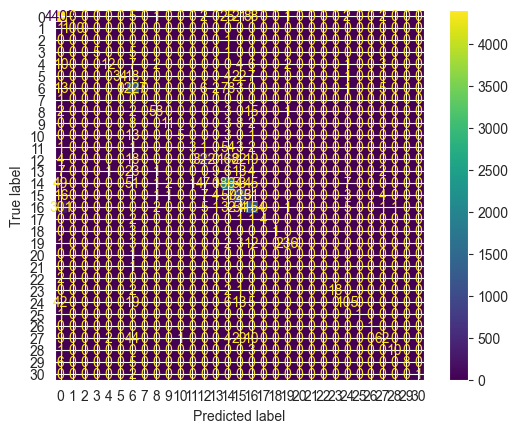

[[4397    0    0    0    0    0    4    0    1    0    0    0    2    0
    24   21   96    0    0    1    0    0    1    1    2    0    0    0
     0    0    0]
 [   0  101    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    0    0    5    0    0    5    0    0    0    0    0    0    0
     1    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [  10    0    0    0   12    0    6    0    1    0    0    0    0    0
     1    3    7    0    0    2    0    0    0    0    0    0    0    5
     0    0    0]
 [   0    0    0    0    0   31   21    0    0    0    0    0    0    0
     4   23    6    0    0    0    0    0    0    0    1    0    0    0
     0    0    0]
 [  12    0    0    2    0  

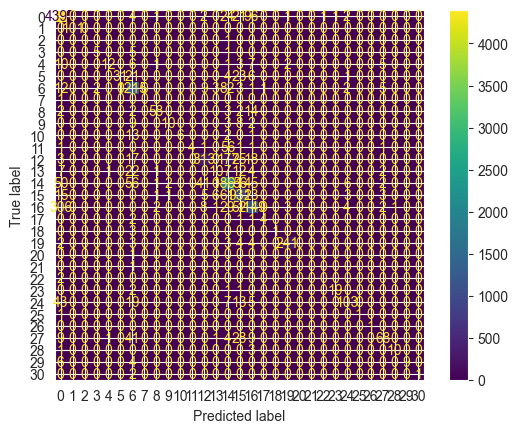

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
dt_classifier = RandomForestClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot()

In [57]:
from sklearn.metrics import accuracy_score
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8307045215562566

0.8292485642643371

In [58]:
dt_classifier = RandomForestClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8573970719081129

0.8549704764215805

In [59]:
from sklearn.metrics import accuracy_score
dt_classifier = GradientBoostingClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
metrics.accuracy_score(y_test, y_pred)        

0.843322818086225

0.8434845911186605

In [ ]:
import numpy as np

# Assuming y is the vector of labels in your dataset
unique_labels = np.unique(y)
num_classes = len(unique_labels)

print("Number of classes:", num_classes)
print("Unique labels:", unique_labels)


In [ ]:
from sklearn.preprocessing import label_binarize

def plot_roc(y_test, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    if len(np.unique(y_test)) == 2:
        # Binary classification
        fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
        roc_auc = metrics.auc(fpr, tpr)

        plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

    else:
        # Multiclass classification
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
        n_classes = y_test_bin.shape[1]

        for i in range(n_classes):
            fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:, 1], y_score[:, 1])
            roc_auc[i] = metrics.auc(fpr[i], tpr[i])

            plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve class %d (area = %0.2f)' % (i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


In [ ]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
plot_roc(y_test, y_pred_prob)

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot([0, 1], [0, 1], 'r--', label='Random')
# for i in range(num_classes):
    # plt.plot(fpr[i], tpr[i], label='Class {}: AUC = {:.2f}'.format(i, roc_auc[i]))
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()
